# Import Libraries

In [204]:
!pip install imutils
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [205]:
!git clone https://github.com/NouranHany/Transformers.git

fatal: destination path 'Transformers' already exists and is not an empty directory.


In [206]:
!unzip '/content/Transformers/Macathon/data/cropped_letters.zip'  -d './cropped_letters'
!unzip '/content/Transformers/Macathon/data/cropped_numbers.zip'  -d './cropped_numbers'
!unzip '/content/Transformers/Macathon/data/testLetters.zip'  -d './test_images'

Archive:  /content/Transformers/Macathon/data/cropped_letters.zip
cropped_letters/ا/:  mismatching "local" filename (cropped_letters/╪з/),
         continuing with "central" filename version
cropped_letters/ا/0.jpg:  mismatching "local" filename (cropped_letters/╪з/0.jpg),
         continuing with "central" filename version
replace ./cropped_letters/cropped_letters/ا/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/Transformers/Macathon/data/cropped_numbers.zip
replace ./cropped_numbers/cropped_numbers/0/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/Transformers/Macathon/data/testLetters.zip
replace ./test_images/testLetters/00000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [207]:
!git clone https://github.com/ahmedramadan96/EALPR.git


fatal: destination path 'EALPR' already exists and is not an empty directory.


### Including needed libraries

In [231]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize, rescale
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D,BatchNormalization
from imutils import paths
from skimage.segmentation import clear_border
from PIL import Image
import seaborn as sn
import argparse
import imutils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage 
#from imutils.perspective import four_point_transform
import os
import cv2
import csv
import glob
import skimage.io as io
import pickle
from skimage.color import rgb2gray, gray2rgb
%matplotlib inline

### Defining needed preprocessing functions.

In [209]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

def change_size(image):
    img = array_to_img(image, scale=False) #returns PIL Image
    img = img.resize((32, 32)) #resize image
    arr = img_to_array(img) #convert back to array
    return arr.astype(np.float64)

In [210]:
letters='/content/cropped_letters/cropped_letters'
numbers='/content/cropped_numbers/cropped_numbers'

In [211]:
import pathlib

data_dir_letters = pathlib.Path(letters)
data_dir_numbers = pathlib.Path(numbers)

data_dir_numbers

PosixPath('/content/cropped_numbers/cropped_numbers')

In [212]:
list(data_dir_numbers.glob('*/*.jpg'))[:5]
list(data_dir_letters.glob('*/*.jpg'))[:5]

[PosixPath('/content/cropped_letters/cropped_letters/ص/29.jpg'),
 PosixPath('/content/cropped_letters/cropped_letters/ص/34.jpg'),
 PosixPath('/content/cropped_letters/cropped_letters/ص/202.jpg'),
 PosixPath('/content/cropped_letters/cropped_letters/ص/153.jpg'),
 PosixPath('/content/cropped_letters/cropped_letters/ص/348.jpg')]

In [213]:
image_count_letters = len(list(data_dir_letters.glob('*/*.jpg')))
image_count_numbers = len(list(data_dir_numbers.glob('*/*.jpg')))

print(image_count_numbers,image_count_letters)

12493 12509


In [214]:
# images_dict = {
#     '0': list(data_dir_numbers.glob('0/*')),
#     '1': list(data_dir_numbers.glob('1/*')),
#     '2': list(data_dir_numbers.glob('2/*')),
#     '4': list(data_dir_numbers.glob('4/*')),
#     '5': list(data_dir_numbers.glob('5/*')),
#     '3': list(data_dir_numbers.glob('3/*')),
#     '6': list(data_dir_numbers.glob('6/*')),
#     '7': list(data_dir_numbers.glob('7/*')),
#     '8': list(data_dir_numbers.glob('8/*')),
#     '9': list(data_dir_numbers.glob('9/*')),
# # }
# # letters_images_dict = {
#     'ا': list(data_dir_letters.glob('ا/*')),
#     'ب': list(data_dir_letters.glob('ب/*')),
#     'ت': list(data_dir_letters.glob('ت/*')),
#     'ث': list(data_dir_letters.glob('ث/*')),
#     'ج': list(data_dir_letters.glob('ج/*')),
#     'ح': list(data_dir_letters.glob('ح/*')),
#     'خ': list(data_dir_letters.glob('خ/*')),
#     'د': list(data_dir_letters.glob('د/*')),
#     'ذ': list(data_dir_letters.glob('ذ/*')),
#     'ر': list(data_dir_letters.glob('ر/*')),
#     'ز': list(data_dir_letters.glob('ز/*')),
#     'س': list(data_dir_letters.glob('س/*')),
#     'ش': list(data_dir_letters.glob('ش/*')),
#     'ص': list(data_dir_letters.glob('ص/*')),
#     'ض': list(data_dir_letters.glob('ض/*')),
#     'ط': list(data_dir_letters.glob('ط/*')),
#     'ظ': list(data_dir_letters.glob('ظ/*')),
#     'ع': list(data_dir_letters.glob('ع/*')),
#     'غ': list(data_dir_letters.glob('غ/*')),
#     'ف': list(data_dir_letters.glob('ف/*')),
#     'ق': list(data_dir_letters.glob('ق/*')),
#     'ك': list(data_dir_numbers.glob('ك/*')),
#     'ل': list(data_dir_numbers.glob('ل/*')),
#     'ن': list(data_dir_numbers.glob('ن/*')),
#     'م': list(data_dir_numbers.glob('م/*')),
#     'ه': list(data_dir_numbers.glob('ه/*')),
#     'و': list(data_dir_numbers.glob('و/*')),
#     'ي': list(data_dir_numbers.glob('ي/*')),

# }
# classes={
#     '0': 0,
#     '1': 1,
#     '2': 2,
#     '3': 3,
#     '4':4,
#     '5':5,
#     '6':6,
#     '7':7,
#     '8':8,
#     '9':9,
#    'ا':10    ,
#     'ب':11,
#     'ت':12,
#     'ث':13,
#     'ج':14,
#     'ح':15,
#     'خ':16,
#     'د':17,
#     'ذ':18,
#     'ر':19,
#     'ز':20,
#     'س':21,
#     'ش':22,
#     'ص':23,
#     'ض':24,
#     'ط':25,
#     'ظ':26,
#     'ع':27,
#     'غ':28,
#     'ف':29,
#     'ق':30,
#     'ك':31,
#     'ل':32,
#     'م':33,
#     'ن':34,
#     'ه':35,
#     'و':36,
#     'ي':37,
# }

In [215]:
data ='/content/EALPR/EALPR- LP characters dataset/Characters/'
data = pathlib.Path(data)
data1=list(data.glob('*.png'))
n=list(data.glob('*ن*.png'))
len(n)

261

In [267]:
images_dict = {
    '0': list(data.glob('*٠*.png')),
    '1': list(data.glob('*١*.png')),
    '2': list(data.glob('*٢*.png')),
    '4': list(data.glob('*٤*.png')),
    '5': list(data.glob('*٥*.png')),
    '3': list(data.glob('*٣*.png')),
    '6': list(data.glob('*٦*.png')),
    '7': list(data.glob('*٧*.png')),
    '8': list(data.glob('*٨*.png')),
    '9': list(data.glob('*٩*.png')),
# }
# letters_images_dict = {
    'أ': list(data.glob('*أ*.png')),
    'ب': list(data.glob('*ب*.png')),
    # 'ت': list(data.glob('*ت*.png')),
    # 'ث': list(data.glob('*ث*.png')),
    'ج': list(data.glob('*ج*.png')),
    # 'ح': list(data.glob('*ح*.png')),
    # 'خ': list(data.glob('*خ*.png')),
    'د': list(data.glob('*د*.png')),
    # 'ذ': list(data.glob('*ذ*.png')),
    'ر': list(data.glob('*ر*.png')),
    # 'ز': list(data.glob('*ز*.png')),
    'س': list(data.glob('*س*.png')),
    # 'ش': list(data.glob('*ش*.png')),
    'ص': list(data.glob('*ص*.png')),
    # 'ض': list(data.glob('*ض*.png')),
    'ط': list(data.glob('*ط*.png')),
    # 'ظ': list(data.glob('*ظ*.png')),
    'ع': list(data.glob('*ع*.png')),
    # 'غ': list(data.glob('*غ*.png')),
    'ف': list(data.glob('*ف*.png')),
    'ق': list(data.glob('*ق*.png')),
    # 'ك': list(data.glob('*ك*.png')),
    'ل': list(data.glob('*ل*.png')),
    'ن': list(data.glob('*ن*.png')),
    'م': list(data.glob('*م*.png')),
    'ھ': list(data.glob('*ھ*.png')),
    'و': list(data.glob('*و*.png')),
    'ي': list(data.glob('*ي*.png')),


}
classes={'أ': 0, 'ب': 1, 'ج': 2, 'د': 3, 'ر': 4, 'س': 5, 'ص': 6, 'ط': 7, 
         'ع': 8, 'ف': 9, 'ق': 10, 'ل': 11, 'م': 12, 'ن': 13, 'ھ': 14, 'و': 15,
         'ي': 16, '0': 17, '1': 18, '2': 19, '3': 20, '4': 21, '5': 22, '6': 23, '7': 24, '8': 25, '9': 26}

In [268]:
img = cv2.imread(str(images_dict["4"][0]) ,0)
img = cv2.resize(img,(25,25))
img.shape

(25, 25)

In [271]:

for i in classes:
  print(len(images_dict[i]))

458
207
221
344
374
423
144
155
316
188
207
210
602
261
274
261
0
1
1361
424
392
598
629
1005
550
291
395


In [218]:
X, y = [], []
c=0
for class_name, images in images_dict.items():
    for image in images:
        n=[0 for _ in range(27)]
        img = cv2.imread(str(image),0)
        
        if img is None:
            c=c+1
        else:
            resized_img = cv2.resize(img,(25,25))
        # img = cv2.resize(img,(25,25))
        X.append(resized_img)
        n[classes[class_name]]=1
        y.append(n)
c

1

In [219]:
# X= X/255.0
X = np.array(X)
y = np.array(y)
X=X/255.0

X.shape

(10017, 25, 25)

In [220]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train.shape,X_val.shape ,X_test.shape,y_train.shape,y_val.shape,y_test.shape

((7211, 25, 25),
 (802, 25, 25),
 (2004, 25, 25),
 (7211, 27),
 (802, 27),
 (2004, 27))

## Apply augmentation
- rotation, shifts, brightness change

In [221]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        
        if(logs.get('accuracy') > 0.98):
            # Stop if threshold is met
            print("\naccuracy of training is bigger than 98!")
            self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [236]:
cnn = Sequential([
  tf.keras.layers.Conv2D(16, (22,22), input_shape=(25, 25, 1), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(16, (22,22), activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(32, (16,16), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(32, (16,16), activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (8,8), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(64, (4,4), activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (4,4), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(128, (4,4), activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(27, activation='softmax')
])

cnn.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
            loss=keras.losses.CategoricalCrossentropy(from_logits=True)
, metrics=['accuracy'])
history = cnn.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32, epochs=80, callbacks=callbacks)

Epoch 1/80


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


226/226 [==============================] - 3s 11ms/step - loss: 2.1082 - accuracy: 0.3237 - val_loss: 2.8116 - val_accuracy: 0.3379
Epoch 2/80
226/226 [==============================] - 2s 9ms/step - loss: 1.0571 - accuracy: 0.6243 - val_loss: 2.0010 - val_accuracy: 0.5212
Epoch 3/80
226/226 [==============================] - 2s 9ms/step - loss: 0.6171 - accuracy: 0.7913 - val_loss: 0.4102 - val_accuracy: 0.8466
Epoch 4/80
226/226 [==============================] - 2s 10ms/step - loss: 0.3657 - accuracy: 0.8788 - val_loss: 0.5287 - val_accuracy: 0.8616
Epoch 5/80
226/226 [==============================] - 2s 9ms/step - loss: 0.2738 - accuracy: 0.9143 - val_loss: 0.2971 - val_accuracy: 0.9127
Epoch 6/80
226/226 [==============================] - 2s 9ms/step - loss: 0.2267 - accuracy: 0.9345 - val_loss: 0.1895 - val_accuracy: 0.9451
Epoch 7/80
226/226 [==============================] - 2s 10ms/step - loss: 0.1953 - accuracy: 0.9440 - val_loss: 0.2880 - val_accuracy: 0.9252
Epoch 8/80
226

In [259]:
cnn.evaluate(X_test,y_test)


63/63 [==============================] - 0s 6ms/step - loss: 0.0936 - accuracy: 0.9800


[0.09363391995429993, 0.9800398945808411]

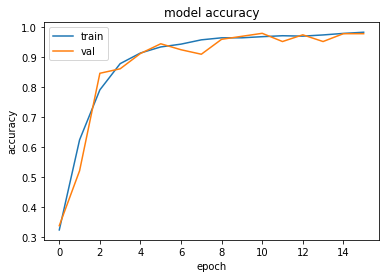

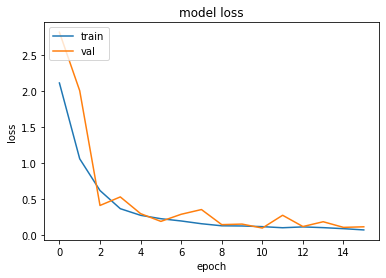

In [272]:
#plot the history of the model
# summarize history for accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [238]:
x = X_test[0]
x= x.reshape(-1,25,25,1)
x=cnn.predict(x)

1/1 [==============================] - 0s 136ms/step


In [239]:
np.max(x),x

(0.89649713,
 array([[4.0167861e-02, 1.0043781e-03, 5.9724585e-05, 6.6194640e-05,
         8.4029525e-06, 5.4607895e-05, 2.5245332e-04, 1.2175777e-03,
         2.8448261e-04, 1.5587641e-05, 1.7969578e-04, 1.5997296e-04,
         3.5630667e-03, 3.7420737e-05, 1.6999306e-06, 5.5765163e-04,
         3.1178370e-06, 1.8139657e-06, 1.0865247e-03, 8.9649713e-01,
         1.3658253e-02, 1.7482232e-02, 2.1441870e-04, 2.6792855e-04,
         1.2784534e-03, 2.1480098e-02, 3.9922344e-04]], dtype=float32))

In [228]:
for i in range(len(x[0])):
     if x[0][i] <= 0.98:
        x[0][i]=0
x,y_test[0][19]

(array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.9820633, 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       ]], dtype=float32), 1)

In [240]:
X_test=X_test.reshape(-1,25,25,1)
predictions = cnn.predict(X_test)
predictions

63/63 [==============================] - 0s 4ms/step


array([[4.01678421e-02, 1.00437866e-03, 5.97245853e-05, ...,
        1.27845339e-03, 2.14800928e-02, 3.99223441e-04],
       [3.73322973e-06, 6.66915014e-07, 1.50541507e-06, ...,
        9.99825299e-01, 1.03821979e-10, 2.22778276e-08],
       [1.29057334e-10, 2.39145422e-11, 2.89862717e-10, ...,
        2.08559602e-12, 1.03177700e-09, 5.43739676e-09],
       ...,
       [4.52820724e-03, 2.91245942e-06, 4.34558594e-08, ...,
        4.34271897e-06, 1.30424916e-03, 2.89885656e-06],
       [4.14249271e-16, 5.35534852e-08, 8.22815600e-12, ...,
        1.15678737e-18, 1.21764321e-16, 4.45290610e-10],
       [1.31057121e-08, 1.12977974e-10, 4.67404206e-11, ...,
        2.20325446e-15, 1.41077028e-09, 1.54000148e-07]], dtype=float32)

In [241]:
cnn_graph = cnn.predict(X_test)
print(cnn_graph[0])

63/63 [==============================] - 0s 4ms/step
[4.0167842e-02 1.0043787e-03 5.9724585e-05 6.6194698e-05 8.4029525e-06
 5.4607895e-05 2.5245332e-04 1.2175777e-03 2.8448261e-04 1.5587641e-05
 1.7969578e-04 1.5997296e-04 3.5630667e-03 3.7420737e-05 1.6999306e-06
 5.5765116e-04 3.1178370e-06 1.8139641e-06 1.0865242e-03 8.9649713e-01
 1.3658259e-02 1.7482240e-02 2.1441888e-04 2.6792855e-04 1.2784534e-03
 2.1480093e-02 3.9922344e-04]


In [247]:
y_predicted_cnn = cnn_graph

print(y_test.shape ,y_predicted_cnn.shape)
cnn_graph

(2004, 27) (2004, 27)


array([[4.01678421e-02, 1.00437866e-03, 5.97245853e-05, ...,
        1.27845339e-03, 2.14800928e-02, 3.99223441e-04],
       [3.73322973e-06, 6.66915014e-07, 1.50541507e-06, ...,
        9.99825299e-01, 1.03821979e-10, 2.22778276e-08],
       [1.29057334e-10, 2.39145422e-11, 2.89862717e-10, ...,
        2.08559602e-12, 1.03177700e-09, 5.43739676e-09],
       ...,
       [4.52820724e-03, 2.91245942e-06, 4.34558594e-08, ...,
        4.34271897e-06, 1.30424916e-03, 2.89885656e-06],
       [4.14249271e-16, 5.35534852e-08, 8.22815600e-12, ...,
        1.15678737e-18, 1.21764321e-16, 4.45290610e-10],
       [1.31057121e-08, 1.12977974e-10, 4.67404206e-11, ...,
        2.20325446e-15, 1.41077028e-09, 1.54000148e-07]], dtype=float32)

In [252]:
y_predicted_cnn = []
for i in cnn_graph:
  n=[]
  for x in i:
    if x >0.95:
        n.append(1)
    else:
      n.append(0)
  y_predicted_cnn.append(n)
len(y_predicted_cnn)
y_predicted_cnn=np.array(y_predicted_cnn)

In [257]:
y_test_g= []
for i in cnn_graph:
  n=[]
  for x in i:
    if x >0.95:
        n.append(1)
    else:
      n.append(0)
  y_test_g.append(n)
len(y_test_g)
y_test_g=np.array(y_test_g)
y_test_g.shape, y_predicted_cnn.shape

((2004, 27), (2004, 27))

In [258]:
# cnn_graph = cnn.predict(X_test)


# y_predicted_cnn = cnn_graph

cm_cnn = tf.math.confusion_matrix(labels=y_test_g, predictions=y_predicted_cnn)


fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
sn.heatmap(cm_cnn, annot=True, linewidths=.5, ax=ax)

InvalidArgumentError: ignored

In [ ]:
x=cnn.predict(X_test)
x[0] ,y_test[0]